In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [72]:
df = pd.read_csv('../data/cleaned_data.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              16412 non-null  object 
 1   Rank              16412 non-null  int64  
 2   Platform          16412 non-null  object 
 3   Year              16412 non-null  int64  
 4   Genre             16412 non-null  object 
 5   Publisher         16412 non-null  object 
 6   NA_Sales          16412 non-null  float64
 7   EU_Sales          16412 non-null  float64
 8   JP_Sales          16412 non-null  float64
 9   Other_Sales       16412 non-null  float64
 10  Global_Sales      16412 non-null  float64
 11  NA_Sales_log      16412 non-null  float64
 12  EU_Sales_log      16412 non-null  float64
 13  JP_Sales_log      16412 non-null  float64
 14  Other_Sales_log   16412 non-null  float64
 15  Global_Sales_log  16412 non-null  float64
 16  Is_Japan_Hit      16412 non-null  int64 

In [74]:
df.columns

Index(['Name', 'Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'NA_Sales_log',
       'EU_Sales_log', 'JP_Sales_log', 'Other_Sales_log', 'Global_Sales_log',
       'Is_Japan_Hit'],
      dtype='object')

In [75]:
df = df.drop(['Rank', 'Name', 'Global_Sales', 'NA_Sales_log','EU_Sales_log', 'JP_Sales_log', 'Other_Sales_log', 'Global_Sales_log'], axis=1)

In [76]:
df.columns

Index(['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Is_Japan_Hit'],
      dtype='object')

In [77]:
df.corr(numeric_only=True)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Is_Japan_Hit
Year,1.000000,-0.091601,0.006077,-0.169151,0.041011,-0.144305
NA_Sales,-0.091601,1.000000,0.767902,0.450400,0.634742,0.315188
EU_Sales,0.006077,0.767902,1.000000,0.435749,0.726268,0.301427
JP_Sales,-0.169151,0.450400,0.435749,1.000000,0.290211,0.768387
Other_Sales,0.041011,0.634742,0.726268,0.290211,1.000000,0.209415
Is_Japan_Hit,-0.144305,0.315188,0.301427,0.768387,0.209415,1.000000


In [78]:
df.corr(numeric_only=True)['NA_Sales']

Year           -0.091601
NA_Sales        1.000000
EU_Sales        0.767902
JP_Sales        0.450400
Other_Sales     0.634742
Is_Japan_Hit    0.315188
Name: NA_Sales, dtype: float64

In [79]:
X = df[['EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Genre', 'Platform', 'Publisher']]
y = df['NA_Sales']

In [80]:
num_attribs = X.select_dtypes(include='number').columns.tolist()
cat_attribs = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [81]:
num_attribs

['EU_Sales', 'JP_Sales', 'Other_Sales', 'Year']

In [82]:
cat_attribs

['Genre', 'Platform', 'Publisher']

In [83]:
num_pipeline = make_pipeline(
    StandardScaler()
)

cat_pipeline = make_pipeline(
    OneHotEncoder(drop='first', handle_unknown='ignore')  
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
def make_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    '''train the model and print metrics'''

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    print("Model Evaluation Results:\n")
    print(f"Train MAE:  {train_mae:.4f}")
    print(f"Test MAE:   {test_mae:.4f}\n")
    print(f"Train MSE:  {train_mse:.4f}")
    print(f"Test MSE:   {test_mse:.4f}\n")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE:  {test_rmse:.4f}\n")
    print(f"Train R²:   {train_r2:.4f}")
    print(f"Test R²:    {test_r2:.4f}")

    return test_pred

In [86]:
lin_reg = make_pipeline(preprocessing, LinearRegression())

In [87]:
lin_reg_pred = make_model(lin_reg)

Model Evaluation Results:

Train MAE:  0.1651
Test MAE:   0.1866

Train MSE:  0.2093
Test MSE:   0.3381

Train RMSE: 0.4575
Test RMSE:  0.5814

Train R²:   0.6849
Test R²:    0.5232


In [88]:
y.mean()

np.float64(0.2656300268096515)

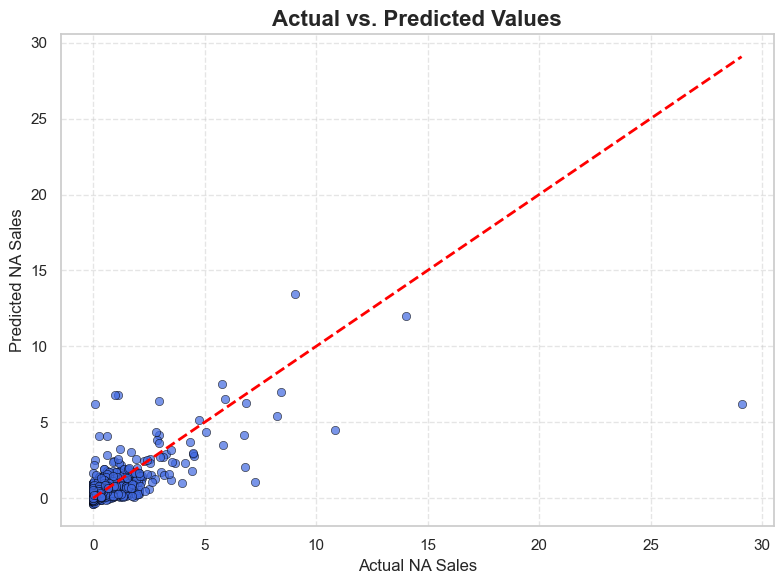

In [134]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=lin_reg_pred, color="royalblue", edgecolor="black", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)

plt.title("Actual vs. Predicted Values", fontsize=16, fontweight="bold")
plt.xlabel("Actual NA Sales", fontsize=12)
plt.ylabel("Predicted NA Sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Checking assumptions

### Linearity & Homoscedasticity

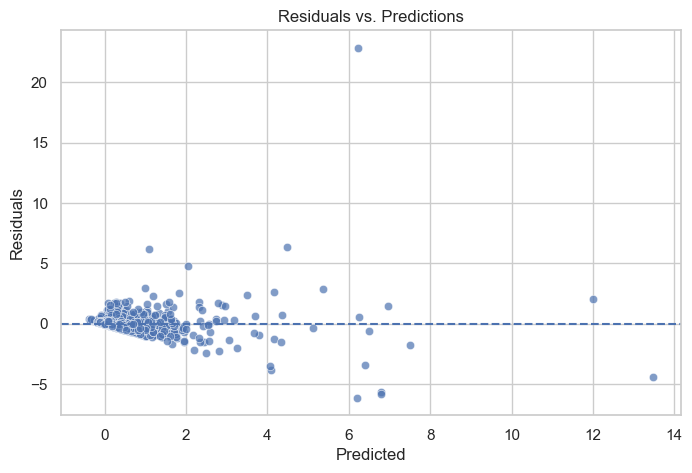

In [133]:
residuals = y_test - lin_reg_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=lin_reg_pred, y=residuals, alpha=0.7)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")
plt.grid(True)
plt.show()

### Normality of Residuals

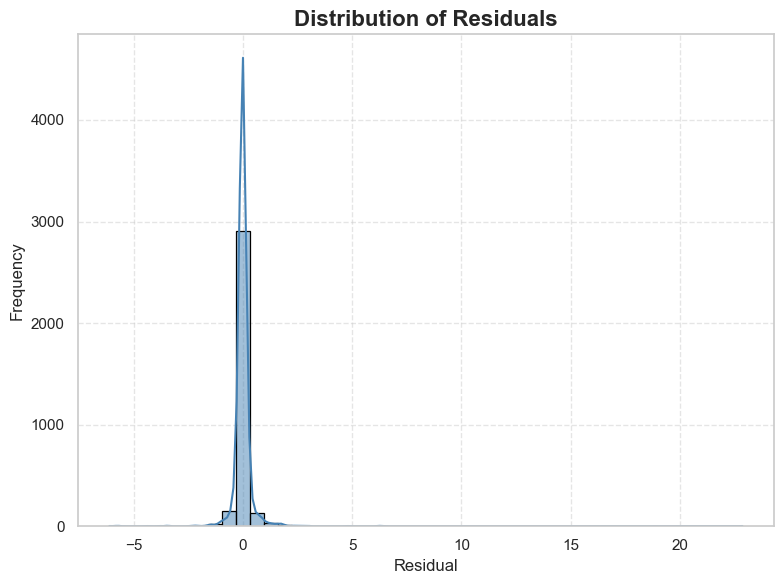

In [130]:
plt.figure(figsize=(8, 6))

sns.histplot(data=residuals, kde=True, bins=45, color="steelblue", edgecolor="black")

plt.title("Distribution of Residuals", fontsize=16, fontweight="bold")
plt.xlabel("Residual", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

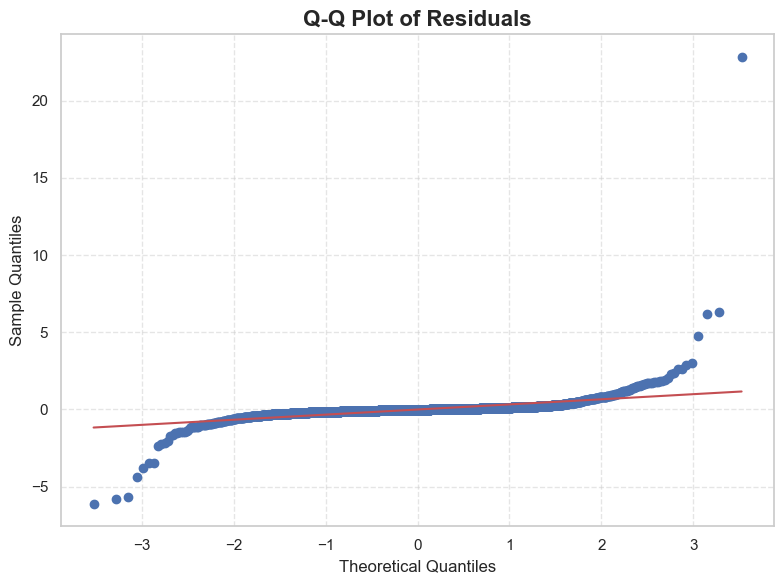

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))

stats.probplot(residuals, dist="norm", plot=plt)

plt.title("Q-Q Plot of Residuals", fontsize=16, fontweight="bold")
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = X.select_dtypes(include=["number"]).copy()

X['Intercept'] = 1  # needed for VIF


vif = pd.DataFrame()
vif["feature"] = X_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
print(vif)

       feature            VIF
0     EU_Sales       2.373946
1     JP_Sales       1.294024
2  Other_Sales       2.077132
3         Year       1.036778
4    Intercept  123513.081322


In [90]:
rfr = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [91]:
rfr_pred = make_model(rfr)

Model Evaluation Results:

Train MAE:  0.0291
Test MAE:   0.0804

Train MSE:  0.0272
Test MSE:   0.1753

Train RMSE: 0.1648
Test RMSE:  0.4187

Train R²:   0.9591
Test R²:    0.7528


In [ ]:
from sklearn.model_selection import GridSearchCV

In [101]:
model = Pipeline([
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor(random_state=42))
])

In [ ]:
param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="r2",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['EU_Sales',
                                                                          'JP_Sales',
                                                                          'Other_Sales',
                                                                          'Year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Genre',
                                                                          'Platform',
                                                                          'Publisher'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [103]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best R² Score (CV): 0.7063895474419146


In [136]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test MSE: ", mean_squared_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R²:", r2_score(y_test, y_pred))


Test MAE: 0.0857175105226707
Test MSE:  0.18030695870343025
Test RMSE: 0.4246256689172597
Test R²: 0.7457040507108703


In [105]:
y_train_pred = best_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("Train MAE: ", round(train_mae, 4))
print("Train MSE: ", round(train_mse, 4))
print("Train RMSE:", round(train_rmse, 4))
print("Train R²:  ", round(train_r2, 4))

Train MAE:  0.0434
Train MSE:  0.0824
Train RMSE: 0.2871
Train R²:   0.8759


In [115]:
best_model = make_pipeline(
    preprocessing,
    RandomForestRegressor(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=50,
        random_state=42
    )
)

In [116]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EU_Sales', 'JP_Sales',
                                                   'Other_Sales', 'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Genre', 'Platform',
                                                   'Publisher'])])),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=50,
                                       random_state=42))])

In [117]:
from joblib import dump, load
dump(best_model, "../model/model.pkl")

['../model/model.pkl']

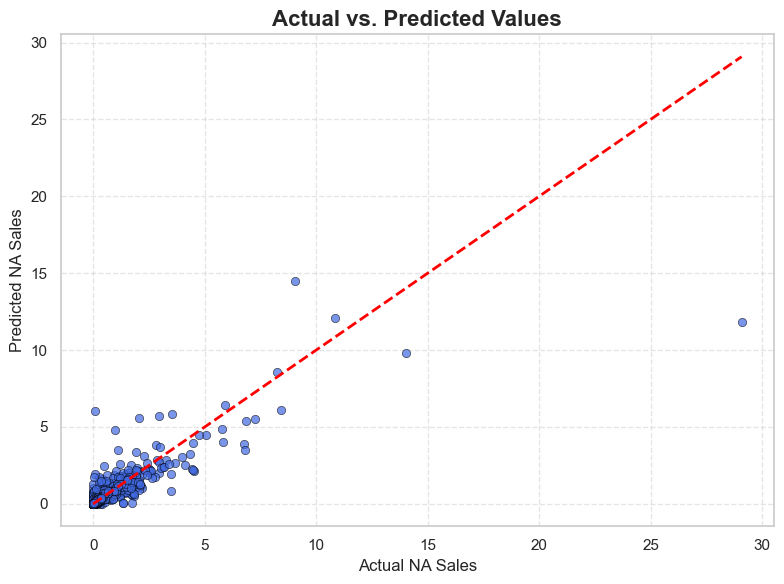

In [135]:
best_model_pred = best_model.predict(X_test)
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=best_model_pred, color="royalblue", edgecolor="black", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)

plt.title("Actual vs. Predicted Values", fontsize=16, fontweight="bold")
plt.xlabel("Actual NA Sales", fontsize=12)
plt.ylabel("Predicted NA Sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [118]:
test_model = load("../model/model.pkl")
new_data = pd.DataFrame([{
    "EU_Sales": 0.5,
    "JP_Sales": 0.1,
    "Other_Sales": 0.2,
    "Year": 2015,
    "Genre": "Action",
    "Platform": "PS4",
    "Publisher": "Ubisoft"
}])

In [119]:
prediction = test_model.predict(new_data)
print("Predicted NA Sales:", prediction[0])

Predicted NA Sales: 0.5711876190476192
